In [1]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [2]:
filenames=[]
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))

In [3]:
len(filenames)

44441

In [4]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable=False
model=tf.keras.models.Sequential([
    base_model,
    GlobalMaxPool2D()
])
model.build(input_shape=(None, 224, 224, 3))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [5]:
def extract_features_from_images(image_path,model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array,axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [55]:
extract_features_from_images(filenames[0],model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


array([0.        , 0.01761619, 0.00171606, ..., 0.01247239, 0.02726399,
       0.0689922 ], dtype=float32)

In [25]:
#image_features = []
#for file in filenames:
#    image_features.append(extract_features_from_images(file,model))

In [78]:
len(image_features)

44441

In [69]:
Image_features = pkl.dump(image_features,open('Image_features.pkl','wb'))

In [70]:
filenames = pkl.dump(filenames,open('filenames.pkl','wb'))

In [6]:
Image_features = pkl.load(open('Image_features.pkl','rb'))

In [7]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [8]:
np.array(Image_features).shape

(44441, 2048)

In [9]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [10]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [11]:
input_image= extract_features_from_images('1528.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [12]:
distance , indices = neighbors.kneighbors([input_image])

In [13]:
indices[0]

array([ 4436,  5523, 15015,   880,   879,  5420], dtype=int64)

In [14]:
from IPython.display import Image

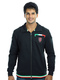

In [15]:
Image('1528.jpg')

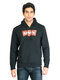

In [16]:
Image(filenames[indices[0][1]])

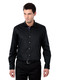

In [18]:
Image(filenames[indices[0][2]])

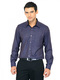

In [19]:
Image(filenames[indices[0][3]])

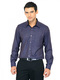

In [20]:
Image(filenames[indices[0][4]])

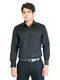

In [21]:
Image(filenames[indices[0][5]])

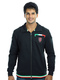

In [24]:
Image(filenames[indices[0][0]])